# Homeworks 4 and 5

This homework will practice several tools that we cover over the past 2 weeks. We will practice handling geopandas, plotting these data on maps, reading/writing in netcdf, and spectral analysis of spatial and temporal data.

Make sure you started your notebook with the ``uwdsgeo`` environment.

**1. Terrestrial Glacier data base** (15 points):

practice geopandas, practice plotting on maps, practice measuring means and correlations, linear regressions.

**2. Ice-shelf seismograms** (15 points)

Time-domain filtering, 1D Fourier transform.

**3. 2D Crustal model** (10 points)

practice reading netcdf, making maps and exploring 2D spectral content.


## 1. Terrestrial Glaciers 

We will look at ice thickness of global glaciers from Welty et al, 2021:\
Welty, E., Zemp, M., Navarro, F., Huss, M., Fürst, J.J., Gärtner-Roer, I., Landmann, J., Machguth, H., Naegeli, K., Andreassen, L.M. and Farinotti, D., 2020. Worldwide version-controlled database of glacier thickness observations. Earth System Science Data, 12(4), pp.3039-3055. https://doi.org/10.5194/essd-12-3039-2020

### a) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy

In [1]:
# solution
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show
from rasterio.mask import mask

### b) Import data (2 points)
Read the glacier data from the file ``glathida/data/T.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

In [2]:
# solution
glacier = pd.read_csv('T.csv')
glacier.head()
#the dataframe contains data on glaciers, such as glacier id, lat, long, date, area, and metadata including investigator and angency

,GlaThiDa_ID,POLITICAL_UNIT,GLACIER_NAME,GLACIER_DB,GLACIER_ID,LAT,LON,SURVEY_DATE,ELEVATION_DATE,AREA,...,SURVEY_METHOD_DETAILS,NUMBER_OF_SURVEY_POINTS,NUMBER_OF_SURVEY_PROFILES,TOTAL_LENGTH_OF_SURVEY_PROFILES,INTERPOLATION_METHOD,INVESTIGATOR,SPONSORING_AGENCY,REFERENCES,DATA_FLAG,REMARKS
0,1,SE,ISFALLSGLAC,WGI,SE4B000E0006,67.91500,18.56800,19790399.0,19799999.0,1.3,...,NaN,NaN,NaN,NaN,NaN,Schytt V. and others,University of Iceland,"Björnsson, H., (1981). Geogr. Ann.",NaN,NaN
1,2,SE,RABOTS GLACIAER,WGI,SE4B000E1016,67.91000,18.49600,19790399.0,19799999.0,4.1,...,NaN,NaN,10.0,NaN,NaN,Schytt V. and others,University of Iceland,"Björnsson, H., (1981). Geogr. Ann.",NaN,NaN
2,3,SE,STORGLACIAEREN,WGI,SE4B000E0005,67.90000,18.57000,19790399.0,19799999.0,3.1,...,NaN,NaN,NaN,NaN,NaN,Schytt V. and others,University of Iceland,"Björnsson, H., (1981). Geogr. Ann.",NaN,NaN
3,4,US,SOUTH CASCADE,WGI,US2M00264006,48.35698,-121.05735,19759999.0,19759999.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Driedger, C.L., and Kennard, P.M., (1986a). An...",NaN,NaN
4,5,CA,ATHABASCA,FOG,7,52.17540,-117.28400,NaN,NaN,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Driedger, C.L., and Kennard, P.M., (1986a). An...",NaN,NaN


### c) Convert Pandas to Geopandas (1 point)
You can create a Geopandas GeoDataFrame from a Pandas DataFrame if there is coordinate data in the DataFrame. In the data that you opened above, there are columns for the ``X`` (or longitude) and ``Y`` (or latitude) coordinates of each rock formation - with headers named ``X`` (or here LON) and ``Y`` (or LAT).

You can convert columns containing x,y coordinate data using the GeoPandas ``points_from_xy()`` function as follows:

``coordinates = gpd.points_from_xy(column-with-x-data.X, column-with-y-data.Y)``

Describe the new geopandas.

In [3]:
# solution
gdf = gpd.GeoDataFrame(glacier,
geometry = gpd.points_from_xy(glacier.LON, glacier.LAT))
gdf.head()
#the geopandas dataframe is the same as the glacier dataframe but with an additional column that includes the lat long of each rock formation at the end. 

,GlaThiDa_ID,POLITICAL_UNIT,GLACIER_NAME,GLACIER_DB,GLACIER_ID,LAT,LON,SURVEY_DATE,ELEVATION_DATE,AREA,...,NUMBER_OF_SURVEY_POINTS,NUMBER_OF_SURVEY_PROFILES,TOTAL_LENGTH_OF_SURVEY_PROFILES,INTERPOLATION_METHOD,INVESTIGATOR,SPONSORING_AGENCY,REFERENCES,DATA_FLAG,REMARKS,geometry
0,1,SE,ISFALLSGLAC,WGI,SE4B000E0006,67.91500,18.56800,19790399.0,19799999.0,1.3,...,NaN,NaN,NaN,NaN,Schytt V. and others,University of Iceland,"Björnsson, H., (1981). Geogr. Ann.",NaN,NaN,POINT (18.56800 67.91500)
1,2,SE,RABOTS GLACIAER,WGI,SE4B000E1016,67.91000,18.49600,19790399.0,19799999.0,4.1,...,NaN,10.0,NaN,NaN,Schytt V. and others,University of Iceland,"Björnsson, H., (1981). Geogr. Ann.",NaN,NaN,POINT (18.49600 67.91000)
2,3,SE,STORGLACIAEREN,WGI,SE4B000E0005,67.90000,18.57000,19790399.0,19799999.0,3.1,...,NaN,NaN,NaN,NaN,Schytt V. and others,University of Iceland,"Björnsson, H., (1981). Geogr. Ann.",NaN,NaN,POINT (18.57000 67.90000)
3,4,US,SOUTH CASCADE,WGI,US2M00264006,48.35698,-121.05735,19759999.0,19759999.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Driedger, C.L., and Kennard, P.M., (1986a). An...",NaN,NaN,POINT (-121.05735 48.35698)
4,5,CA,ATHABASCA,FOG,7,52.17540,-117.28400,NaN,NaN,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,"Driedger, C.L., and Kennard, P.M., (1986a). An...",NaN,NaN,POINT (-117.28400 52.17540)


### d) Mapping geopandas points (3 points)

Import a nice background elevation map using a rasterIO image. Use the tutorial instructions and download the file from;
https://www.naturalearthdata.com/downloads/50m-raster-data/50m-cross-blend-hypso/


In [4]:
# solution
elevation = rasterio.open("HYP_50M_SR.tif")

___Tips___: when plotting a image in ``matplotlib`` you need to add information about the physical dimensions of the image. You can calculate the ``bounds``.

In [5]:
bounds = (elevation.bounds.left, elevation.bounds.right, \
          elevation.bounds.bottom, elevation.bounds.top)

We will use ``matplotlib.pyplot`` to show the raster image in the background (tips: use ``imshow()``. The raster image in matplotlib can only import one frame and not three (R, G, B) frames. We will first stack the three images together. 

In [6]:
red = elevation.read(1)
green = elevation.read(2)
blue = elevation.read(3)
pix = np.dstack((red, green, blue))

Then we will use ``pix`` as the first layer of the plot. Because ``pix`` only contains pixel dimension, you can add the physical dimension using the argument ``extent=bounds`` in your first plot.
Then add the Geopandas points using the geopandas ``plot()`` function and customize the marker size, style, and color using your artistic talents. Please anotate the figure with x and y labels, a title, and save the figure into a PNG. The figure should be saved into an 11x8 inch plot, and fontsize should be at least 14 points. You can set your default values for all of your plots using the ``rc.Params.update`` parameters we tested in the week3_lab1 tutorial.

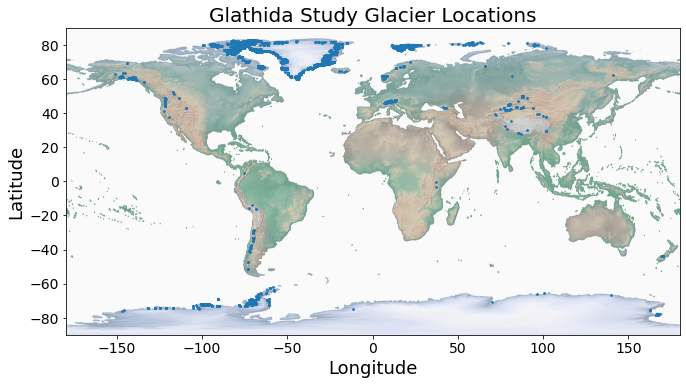

In [7]:
# solution
fig, ax = plt.subplots(figsize = (11, 8))
plt.imshow(pix, extent = bounds)
gdf.plot(ax = ax, markersize = 3)
plt.xlabel('Longitude', fontsize = 18)
plt.xticks(fontsize = 14)
plt.ylabel('Latitude', fontsize = 18)
plt.yticks(fontsize = 14)
plt.title('Glathida Study Glacier Locations', fontsize = 20)
plt.savefig('Homework_4_5_GlathidaLocations')

### e) Explore the data with vizualisation (3 points)
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``MEAN_THICKNESS``, ``AREA``, ``MEAN_SLOPE`` parameters.

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope


In [8]:
gdf2=gdf.dropna(subset=['MEAN_THICKNESS','AREA','MEAN_SLOPE'])

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

__Tips__: 
1. Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
2. use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
3. Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with units. ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

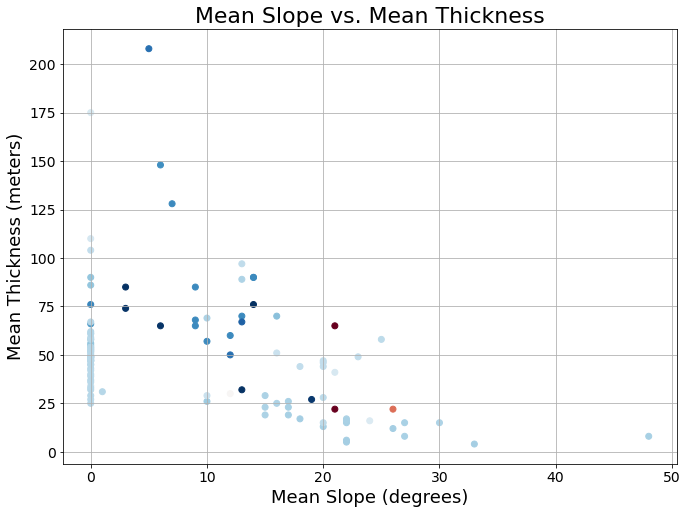

In [9]:
# Figure 1: Mean slope vs mean thickness
# solution
plt.figure(figsize = (11, 8))
plt.scatter(gdf2["MEAN_SLOPE"], gdf2["MEAN_THICKNESS"], c = gdf2['LAT'], cmap = 'RdBu')
plt.title("Mean Slope vs. Mean Thickness", fontsize = 22)
#plt.xscale('log')
plt.xlabel("Mean Slope (degrees)", fontsize = 18)
plt.xticks(fontsize = 14)
plt.ylabel("Mean Thickness (meters)", fontsize = 18)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.show()

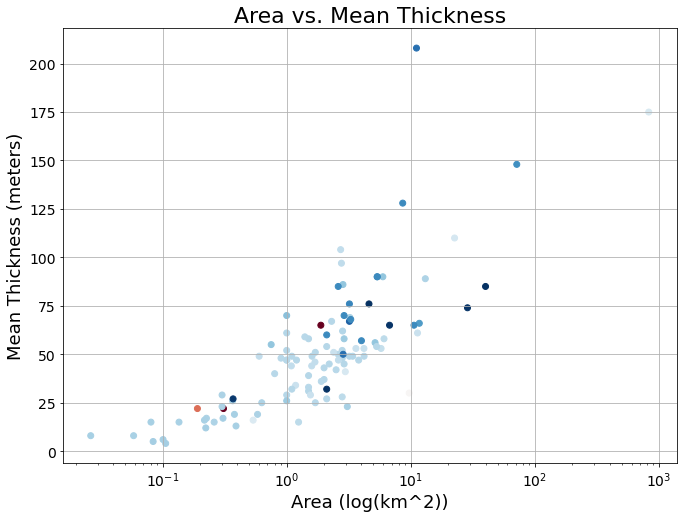

In [10]:
# Figure 2: area vs mean thickness
# solution
plt.figure(figsize = (11, 8))
plt.scatter(gdf2["AREA"], gdf2["MEAN_THICKNESS"], c = gdf2['LAT'], cmap = 'RdBu')
plt.title("Area vs. Mean Thickness", fontsize = 22)
plt.xscale('log')
plt.xlabel("Area (log(km^2))", fontsize = 18)
plt.xticks(fontsize = 14)
plt.ylabel("Mean Thickness (meters)", fontsize = 18)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.show()

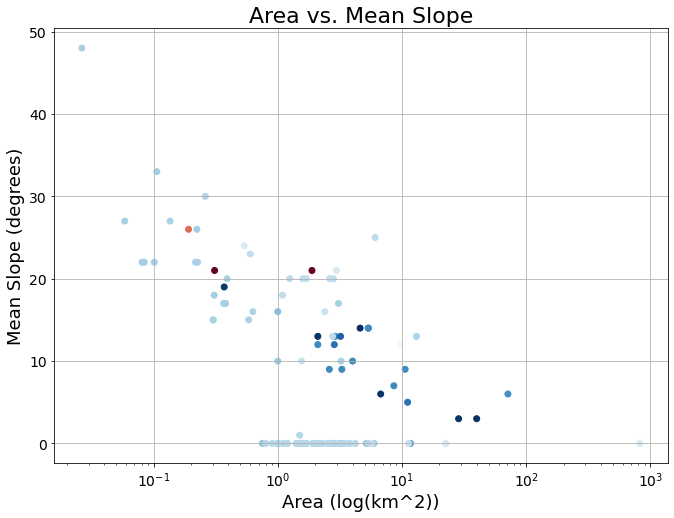

In [11]:
# Figure 2: area vs mean slope
# solution
plt.figure(figsize = (11, 8))
plt.scatter(gdf2["AREA"], gdf2["MEAN_SLOPE"], c = gdf2['LAT'], cmap = 'RdBu')
plt.title("Area vs. Mean Slope", fontsize = 22)
plt.xscale('log')
plt.xlabel("Area (log(km^2))", fontsize = 18)
plt.xticks(fontsize = 14)
plt.ylabel("Mean Slope (degrees)", fontsize = 18)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.show()

### f) Linear Regression (5 points total counted in the next section)
You found from basic data visualization that the three parameters ``MEAN_SLOPE``, ``MEAN_THICKNESS``, and ``AREA`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

**1. Simple linear regression (1 point)**
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [12]:
# solution
from sklearn.linear_model import LinearRegression
slope = np.asarray(gdf2["MEAN_SLOPE"]).reshape(-1,1)
thickness = np.asarray(gdf2["MEAN_THICKNESS"]).reshape(-1,1)
area = np.asarray(gdf2["AREA"]).reshape(-1,1)
logarea = np.log(area)
LR = LinearRegression()
LR.fit(slope, thickness)
thickslopespred = LR.predict(slope)
LR.fit(logarea, thickness)
areathickpred = LR.predict(logarea)
LR.fit(logarea, slope)
areaslopepred = LR.predict(logarea)



Make a plot of the data and the linear regression your just performed

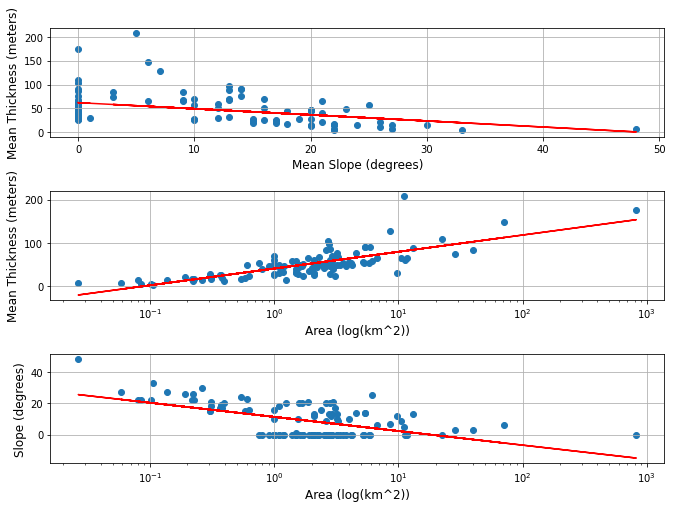

In [13]:
#solution
fig, ax = plt.subplots(3,1, figsize = (11,8))
plt.subplots_adjust(hspace = 0.5)
ax[0].scatter(slope, thickness)
ax[0].plot(slope, thickslopespred, color = "red")
ax[0].set_xlabel("Mean Slope (degrees)", fontsize = 12)
ax[0].set_ylabel("Mean Thickness (meters)", fontsize = 12)
ax[0].grid(True)
ax[1].scatter(area, thickness)
ax[1].plot(area, areathickpred, color = "red")
ax[1].set_xlabel("Area (log(km^2))", fontsize = 12)
ax[1].set_xscale('log')
ax[1].set_ylabel("Mean Thickness (meters)", fontsize = 12)
ax[1].grid(True)
ax[2].scatter(area, slope)
ax[2].plot(area, areaslopepred, color = "red")
ax[2].set_xlabel("Area (log(km^2))", fontsize = 12)
ax[2].set_ylabel("Slope (degrees)", fontsize = 12)
ax[2].set_xscale('log')
ax[2].grid(True)

Briefly comment on the quality of your fit and a linear regression (1 point)

The linear regressions for the top two plots seem pretty good. The third linear regression appears skewed by the glaciers that have a 0 degree slope, this pulls down the regression lower than it probably should be.

**2. Leave One Out Cross Validation linear regression (1 point)**


Perform the LOCCV on the ``AREA`` and ``THICKNESS`` values. Predict the ``THICKNESS`` value knowing a ``AREA`` value. Use material seen in class. Make a plot of your fit.

mean of the slope estimates 16.7610464.2 and the standard deviation 0.1560294.2
CV = 1669.8939064.2


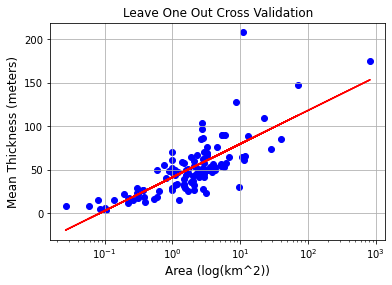

In [14]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
# solution
loo = LeaveOneOut()

slope = np.asarray(gdf2["MEAN_SLOPE"]).reshape(-1,1)
thickness = np.asarray(gdf2["MEAN_THICKNESS"]).reshape(-1,1)
area = np.asarray(gdf2["AREA"]).reshape(-1,1)
logarea = np.log(area)

vel = np.zeros(len(thickness))
mse = np.zeros(len(thickness))
r2s = np.zeros(len(thickness))
i = 0
for train_index, val_index in loo.split(thickness):
    thickness_train, thickness_val = thickness[train_index], thickness[val_index]
    logarea_train, logarea_val = logarea[train_index], logarea[val_index]
    
    regr = LinearRegression()
    regr_val = LinearRegression()
    
    regr.fit(logarea_train, thickness_train)
    regr_val.fit(logarea_val, thickness_val)
    
    thickpred = regr.predict(logarea)
    thickpred_val = regr_val.predict(logarea)
    
    vel[i] = regr.coef_[0][0]
    mse[i] = mean_squared_error(thickpred, thickpred_val)
    r2s[i] = r2_score(thickpred, thickpred_val)
    i+=1
    
# the data shows cleary a trend, so the predictions of the trends are close to each other:
print("mean of the slope estimates %f4.2 and the standard deviation %f4.2"%(np.mean(vel),np.std(vel)))
# the test error is the average of the mean-square-errors
print("CV = %f4.2"%(np.mean(mse)))
plt.scatter(area, thickness, color = "blue")
plt.plot(area, thickpred, color = "red")
plt.xscale("log")
plt.title("Leave One Out Cross Validation")
plt.xlabel("Area (log(km^2))", fontsize = 12)
plt.ylabel("Mean Thickness (meters)", fontsize = 12)
plt.grid(True)
plt.show()

**3. Bootstrapping (1 point)**

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help.

mean of the slope estimates 16.4752414.2 and the standard deviation 1.8239454.2


(array([ 5., 11., 20., 22., 22., 11.,  6.,  1.,  0.,  2.]),
 array([12.63611212, 13.66918174, 14.70225136, 15.73532098, 16.7683906 ,
        17.80146022, 18.83452984, 19.86759946, 20.90066908, 21.9337387 ,
        22.96680832]),
 <BarContainer object of 10 artists>)

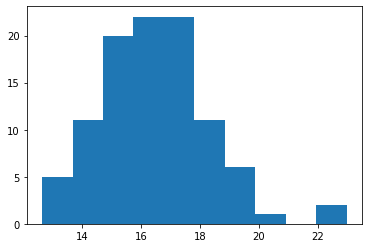

In [15]:
from sklearn.utils import resample
# solution
k = 100
vel = np.zeros(k)
mse = np.zeros(k)
r2s = np.zeros(k)
i = 0

for iik in range (k):
    ii = resample(np.arange(len(thickness)), replace = True, n_samples = len(thickness))
    thickness_b, logarea_b = thickness[ii], logarea[ii]
    
    regr = LinearRegression()
    regr_val = LinearRegression()
    
    regr.fit(logarea_b, thickness_b)
    thicknesspred = regr.predict(logarea)
    
    vel[i] = regr.coef_[0][0]
    i+=1
# the data shows cleary a trend, so the predictions of the trends are close to each other:
print("mean of the slope estimates %f4.2 and the standard deviation %f4.2"%(np.mean(vel),np.std(vel)))
plt.hist(vel)

**4. Predict the thickness of a glacier (2 points)**

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

mean of the thickness estimates 164.7524104.2 and the standard deviation 18.2394464.2


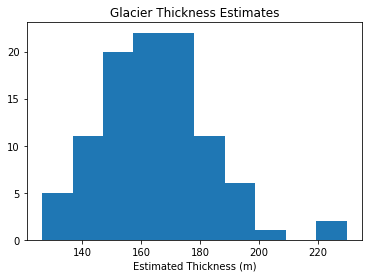

In [16]:
# solution
glacier_area = 10
estimates = glacier_area * vel
plt.hist(estimates)
plt.title("Glacier Thickness Estimates")
plt.xlabel("Estimated Thickness (m)")
print("mean of the thickness estimates %f4.2 and the standard deviation %f4.2"%(np.mean(estimates),np.std(estimates)))

## 2) Spectrogram analysis of iceshelf vibrations (15 points total)

We will explore the spectral content of the vibrations felt on iceshelves. We first download seismic data, then filter it at different frequency bandwidths, then plot the spectrogram and comment on the data.

The seismic data is handled by the Obspy package. Review the obspy tutorial that Ariane.
We will download the data presented in: Aster, R.C., Lipovsky, B.P., Cole, H.M., Bromirski, P.D., Gerstoft, P., Nyblade, A., Wiens, D.A. and Stephen, R., 2021. Swell‐Triggered Seismicity at the Near‐Front Damage Zone of the Ross Ice Shelf. Seismological Research Letters. https://doi.org/10.1785/0220200478

__Tips__:
1. Check out the SciPy filtering help here: https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html. Obspy has built in functions as well, but for the sake of practicing, explore the scipy filtering functions.

2. The usual steps to handling seismic data are: data download (``get_waveforms``) & removing the instrumental response (``remove_response``).



**a. Import the relevant Obspy python modules (1 point).**

In [2]:
#solution:
from obspy import read
import obspy.clients.earthworm.client as earthworm
import obspy.clients.fdsn.client as fdsn
from obspy import read
from obspy import read_inventory
from obspy import UTCDateTime
from obspy.core.stream import Stream
from obspy.signal.cross_correlation import correlate


In [18]:
# Import the Obspy modules that will be useful to download seismic dat

**b. Data download (2 points)**

We will now download the data from station "DR01" from seismic network "XH", channel "LHN" from 1/1/2015 until 3/31/2015. The client will be the "IRIS" data center. Obspy functions take on UTCDateTime formatted obspy datetime object, be sure to call or import that specific function. (1 point)

In [19]:
#solution
networks = "XH"
stations = "DR01"
channels = "LHN"
Tstart = UTCDateTime(year = 2015, month = 1, day = 1)
Tend = UTCDateTime(year = 2015, month = 3, day = 31)

fdsn_client = fdsn.Client('IRIS')

Dtmp = fdsn_client.get_waveforms(network = networks, station = stations, location = '--', channel = channels, starttime = Tstart, \
                                 endtime = Tend, attach_response = True)

In [20]:
# how many days did we download?
dt=Tend-Tstart # in seconds
Ndays = int(dt/86400) # in days
print(Ndays)

89


**c. Time series filtering (1 point)**

Now we will filter the trace to explore its frequency content. We will apply 3 filters:
1. a ``lowpass`` filter to look at seismic frequencies below 0.01Hz, or 100 s period

2. a ``bandpass`` filter to look at seismic frequencies between 0.01Hz-0.1 Hz (10-100s)

3. a ``highpass`` filter to look at seismic frequencies higher than 0.1 Hz (10s) and until the time series Nyquist frequency (0.5Hz since the data is sampled at 1 Hz).

Text(0.5, 0, 'Time (in days)')

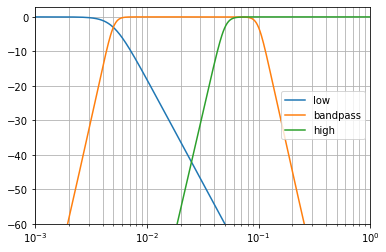

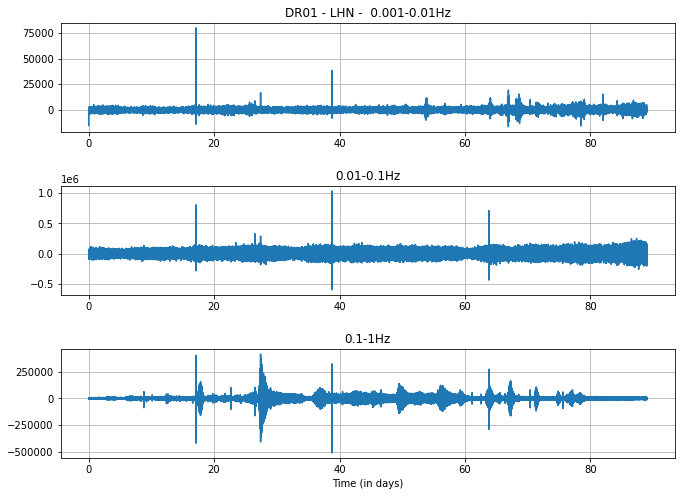

In [21]:
from scipy.signal import butter,buttord,  sosfiltfilt, freqs


# Here we use a Butterworth filter to select the spectral content of the waveform. 
# I like to use Buttord because it finds the order of the filter that meets the amplitude reduction criterion
# it's a lot more intuitive! https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.buttord.html

N1, Wn1 = buttord(0.005, 0.001, 3, 40, True)
b1, a1 = butter(N1, Wn1, 'low', True)
N2, Wn2 = buttord([0.005, 0.1], [0.001, 0.2], 3, 40, True)
b2, a2 = butter(N2, Wn2, 'band', True)
N3, Wn3 = buttord(0.05, 0.1, 3, 40, True)
b3, a3 = butter(N3, Wn3, 'high', True)

w1, h1 = freqs(b1, a1, np.logspace(-3, 0, 500))
w2, h2 = freqs(b2, a2, np.logspace(-3, 0, 500))
w3, h3 = freqs(b3, a3, np.logspace(-3, 0, 500))
plt.semilogx(w1, 20 * np.log10(abs(h1)))
plt.semilogx(w2, 20 * np.log10(abs(h2)))
plt.semilogx(w3, 20 * np.log10(abs(h3)))
plt.legend(['low','bandpass','high'])
plt.axis([0.001, 1, -60, 3])
plt.grid(which='both', axis='both')


## It is recommended to use the second order sections when filtering to avoid transfer function errors.
sos1 = butter(N1, Wn1, 'low', output="sos")
sos2 = butter(N2, Wn2, 'band', output="sos")
sos3 = butter(N3, Wn3, 'high', output="sos")

# filter data
Z1 = sosfiltfilt(sos1, Dtmp[0].data )
Z2 = sosfiltfilt(sos2, Dtmp[0].data)
Z3 = sosfiltfilt(sos3, Dtmp[0].data)


fig,ax=plt.subplots(3,1,figsize=(11,8))
plt.subplots_adjust(hspace = 0.5)
t=np.linspace(0,Ndays,len(Dtmp[0].data))
ax[0].plot(t,Z1);ax[0].set_title('DR01 - LHN -  0.001-0.01Hz');ax[0].grid(True)
ax[1].plot(t,Z2);ax[1].set_title('0.01-0.1Hz');ax[1].grid(True)
ax[2].plot(t,Z3);ax[2].set_title('0.1-1Hz');ax[2].grid(True)
plt.xlabel('Time (in days)')

**c. Fourier transform (3 points)**
Perform and the Fourier amplitude spectrum of the seismogram. Don't forget to label the figure properly! Use the Fourier frequency vector for x-axis. Use the tutorials for inspirtion.

Text(0, 0.5, 'Amplitude (m/s)')

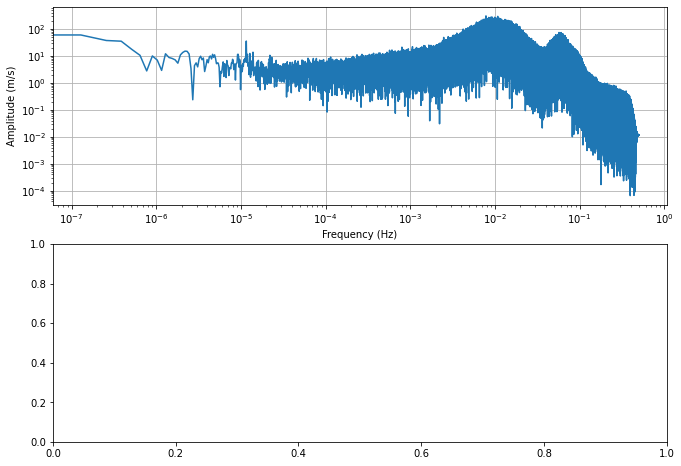

In [22]:
# solution
from scipy.fftpack import fft,ifft, fftfreq, next_fast_len

npts = Dtmp[0].stats.npts

Nfft = next_fast_len(int(Dtmp[0].data.shape[0]))
freqVec = fftfreq(Nfft, d = Dtmp[0].stats.delta)[:Nfft//2]
Zhat = fft(Dtmp[0].data, n = Nfft)

#I couldn't get this to work with just one plot so I did subplots
fig,ax=plt.subplots(2,1,figsize=(11,8))
ax[0].plot(freqVec,np.abs(Zhat[:Nfft//2])/Nfft)
ax[0].grid(True)
ax[0].set_xscale('log');ax[0].set_yscale('log')
ax[0].set_xlabel('Frequency (Hz)');ax[0].set_ylabel('Amplitude (m/s)')


Comment on the spectral content of the seismograms. How does the relative contribution of the low, intermediate, and high frequency signal compares with the relative amplitude observed in the bandpass filtered time series?

There appears to be a greater contribution of intermendiate and high frequency signals than low frequencies. 

**d. Synthetic noise (3 points)**

We have now a good idea of what the amplitude of seismic waves are at this station. Now create a noise signal using the Fourier amplitude spectrum of the seismic signal, and with a random phase. You can use the notes from our first Numpy example (week3_lab1.ipynb)

/srv/conda/envs/notebook/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


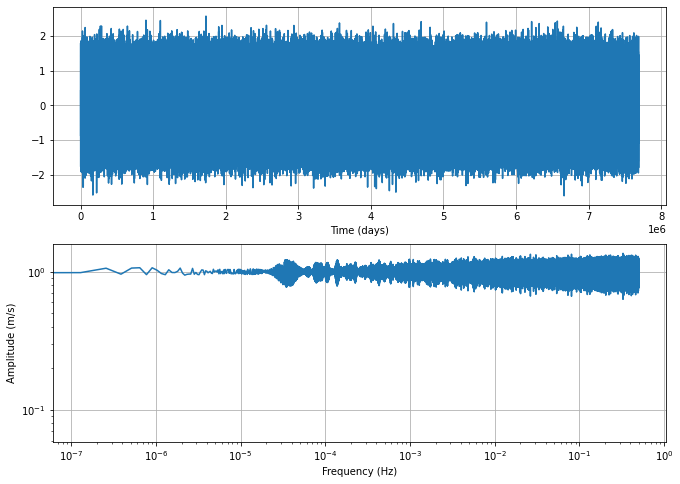

In [23]:
# solution
from numpy import random

noise = 2*random.rand(npts) - 1
T = np.linspace(0,(Tend-Tstart), Dtmp[0].stats.npts)
noisep = np.zeros(Nfft,dtype=complex)
noise = np.zeros(Nfft)
for i in range(1,Nfft//2):
    c=2*random.rand(1)-1
    noisep[i]=  np.exp(1j*np.pi*c[0])
noisep[Nfft//2:] = np.conj(noisep[:Nfft//2-1:-1])
noise = ifft(noisep)[:npts]*np.sqrt(Nfft)

Zhat2 = fft(noise, n = Nfft)

fig, ax =  plt.subplots(2, 1, figsize = (11,8))
ax[0].plot(T, noise)
ax[0].set_xlabel("Time (days)")
ax[0].grid(True)
ax[1].plot(freqVec, np.abs(Zhat2[:Nfft//2])/np.sqrt(Nfft))
ax[1].set_xscale("log"); ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_yscale("log"); ax[1].set_ylabel("Amplitude (m/s)")

ax[1].grid(True)
plt.show()

**e. !Sanity check! (1 point)**

Check that the Fourier amplitude spectrum of the noise is that of the original window. Overlay them on a plot 

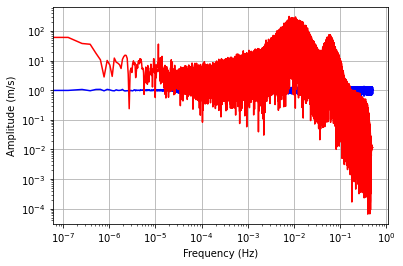

In [24]:
#solution
plt.plot(freqVec, np.abs(Zhat2[:Nfft//2])/np.sqrt(Nfft), color ='b')
plt.plot(freqVec,np.abs(Zhat[:Nfft//2])/Nfft, color = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (m/s)")
plt.grid(True)

**f. Short Time Fourier Transform (4 points)**

STFT are important transforms that are used in data science of time series. They are mainly used for denoising and for feature extraction.
Spectrograms are STFT with window overlap.

In [ ]:
from scipy.signal import stft

nperseg=1000

#solution
f, t, Zxx = stft(Dtmp[0].data, fs = 100, nperseg = nperseg, noverlap = 20)
plt.pcolormesh(T/86400, f, np.abs(Zxx), vmin = 0.1, vmax = 1E2, shading = 'gouraud', cmap = 'turbo')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [Days]');plt.yscale('log');plt.ylim(0.01,0.5)


Now you have created a 2D image of a time series! Many seismologists use that as input to convolutional neural networks.



## 3) 2D Spectral analysis of geological models (10 points)

In this exercise we will correlate water table level with surface elevation. Please download the 3D Geologic framework
https://www.sciencebase.gov/catalog/item/5cfeb4cce4b0156ea5645056
and
https://www.sciencebase.gov/catalog/item/5e287112e4b0d3f93b03fa7f

In the following we will prepare our data.

In [2]:
import netCDF4 as nc

file1 = 'NCM_GeologicFrameworkGrids.nc' # mmake sure that the foler is called correctly.
file2 = 'NCM_SpatialGrid.nc'
file3 = 'NCM_AuxData.nc'
geology = nc.Dataset(file1)
grid = nc.Dataset(file2)
watertable = nc.Dataset(file3)

In [ ]:
print(grid)

In [ ]:
print(geology)

In [31]:
print(watertable)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): dim1(3201), dim2(4901), dim3(212), dim4(164), dim7(47), dim8(26), dim9(37)
    variables(dimensions): |S1 Water table depth file(dim7), |S1 Slopes file(dim8), |S1 Notes(dim9), float32 Water Table Depth(dim2, dim1), float32 Calibration Slope(dim3), float32 Calibration Offset(dim4, dim3)
    groups: 


In [3]:
x = grid['x'][0:4901, 0:3201]
y = grid['y'][0:4901, 0:3201]
y_ticks = grid['Index k grid'][0:4901, 0]
y_labels = grid['Latitude vector'][:]
# recreate the lat long vectors.
minlat,maxlat = min(grid['Latitude vector'][:]),max(grid['Latitude vector'][:])
minlon,maxlon = min(grid['Longitude vector'][:]),max(grid['Longitude vector'][:])
xlat = np.linspace(minlat,maxlat,3201)
xlon = np.linspace(minlon,maxlon,4901)

In [4]:
geology['Surface Elevation'][3246, 1234]
elevation = geology['Surface Elevation'][0:4901, 0:3201]
bedrock = geology['Bedrock Elevation'][0:4901, 0:3201]
WT = watertable.variables['Water Table Depth'][0:4901, 0:3201]

**a. Plot (2 points)**
Plot the data ``WT`` and ``elevation``. Use ``contourf``,``x`` and ``y`` as lat-long variables. You can use ``levels``  to split the color map, and ``alpha`` less than 1 to increase transparency.

Text(0.5, 1.0, 'Western US water table depth')

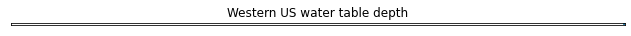

In [20]:

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)
ax.plot(WT, elevation)
ax.contourf(x, y, WT,cmap="RdBu_r",levels=[0,10,20,30,40,50,60,70,80,90,100,200],alpha=0.25)
ax.contour(x, y, elevation,cmap="Greys",linewidths=0.5)
ax.set_aspect('equal','box')
ax.set_xlim(-2.6E6,0);
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Western US water table depth')

**b. Perform and plot the 2D Fourier transforms (4 points)**

/srv/conda/envs/notebook/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/srv/conda/envs/notebook/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitude (m/s)')

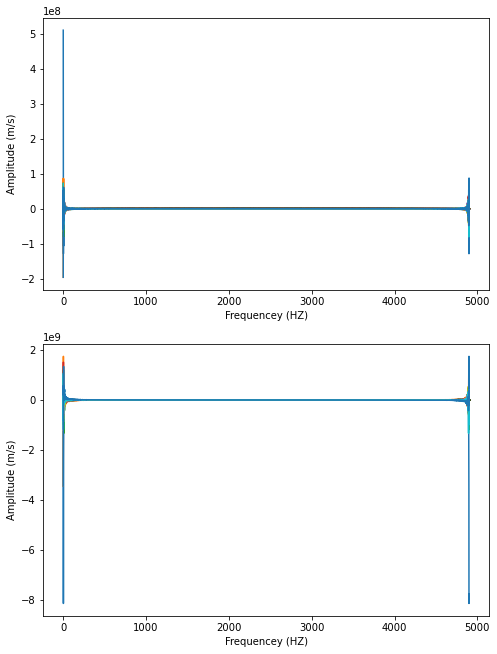

In [5]:
from scipy.fftpack import fft2, fftfreq,fftshift
#solution

wt_fourier = fft2(WT)
ele_fourier = fft2(elevation)

fig, ax = plt.subplots(2,1, figsize = (8,11))
ax[0].plot(wt_fourier)

ax[0].set_xlabel('Frequencey (HZ)')
ax[0].set_ylabel("Amplitude (m/s)")
ax[1].plot(ele_fourier)

ax[1].set_xlabel('Frequencey (HZ)')
ax[1].set_ylabel("Amplitude (m/s)")

**c. Interpretation (1 point)**
Comment on the wavelengths that dominate the DEM and the water table wavelengthsWT

The most dominate wavelenths are both the DEM and the watertable are very large and very small wavelengths. Wavelengths are the inverse of frequency, so frequencies near 0 are very large wavelengths, and the frequencies near 5000 correspond to much smaller wavelengths.

**d. 2D filtering (3 points)**
Find a way to low pass filter the image (spectral filtering or convolution)

Text(0.5, 1.0, 'Western US water table depth Low Pass Filter')

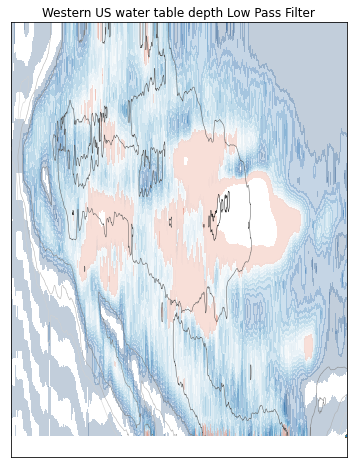

In [25]:
from scipy.signal import butter,buttord,  sosfiltfilt, freqs
N1, Wn1 = buttord(0.005, 0.001, 3, 40, True)
sos1 = butter(N1, Wn1, 'low', output="sos")
WT1 = sosfiltfilt(sos1, WT.data)
Elev1 = sosfiltfilt(sos1, elevation.data)

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)
ax.plot(WT1, Elev1)
ax.contourf(x, y, WT1,cmap="RdBu_r",levels=[0,10,20,30,40,50,60,70,80,90,100,200],alpha=0.25)
ax.contour(x, y, Elev1,cmap="Greys",linewidths=0.5)
ax.set_aspect('equal','box')
ax.set_xlim(-2.6E6,0);
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Western US water table depth Low Pass Filter')